📌I will analyze a dataset of traffic stops in Rhode Island collected by the Stanford Open Policing Project.

## 📋🔎 Examining the dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_csv('police_project.csv')

In [4]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [6]:
df.shape

(91741, 15)

## 🗂 🔎 Preparing dataset 

📌Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.

In [8]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

📌I will leave the county_name column as it contains only missing values. Therefore, this column can be skipped as it does not contain any useful information.

In [9]:
df.drop('county_name', axis=1, inplace=True)

In [10]:
df.shape

(91741, 14)

📌 When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

📌 The driver_gender column will be critical for most of my analysis. Since only a small portion of the rows are missing driver_gender, I will remove these rows from the dataset

In [11]:
df.dropna(subset=['driver_gender'], inplace=True)

In [12]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw            1
driver_age              293
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83210
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
dtype: int64

👆After removing the missing value rows in driver_gender, almost all missing values in the dataset were gone.👌🏻

📌 Correcting the data type will allow us to use mathematical operations in the is_arrested column that are not possible otherwise.   
Working with the appropriate data types will also have a positive effect on our speed.

📌 We know that the is_arrested column currently has an object data type.    
I will change the data type to bool, which is the most appropriate type for a column containing True and False values.

In [14]:
df.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [15]:
df['is_arrested']=df['is_arrested'].astype(bool)

In [16]:
df['is_arrested'].dtype

dtype('bool')

-----------

📌Currently, the date and time of each traffic stop are stored in separate object columns: stop_date and stop_time.  
    I will combine these two columns into one and then convert it to datetime format.   
     This will enable appropriate date-based features in my further analysis.

In [17]:
df.sample()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
76070,2014-03-24,10:00,M,1958.0,56.0,White,Seatbelt Violation,Seat belt,False,NaN,Citation,False,0-15 Min,False


In [20]:
combined=df.stop_date.str.cat(df.stop_time, sep=' ')  
df['stop_datetime']=pd.to_datetime(combined)

In [21]:
df.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
stop_datetime         datetime64[ns]
dtype: object

In [22]:
df.set_index('stop_datetime',inplace=True)

In [24]:
df.sample(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_datetime,,,,,,,,,,,,,,
2013-07-06 15:55:00,2013-07-06,15:55,M,1978.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2012-10-09 08:51:00,2012-10-09,08:51,F,1968.0,44.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
2006-05-06 06:45:00,2006-05-06,06:45,M,1975.0,31.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## 🔎Analysis Part

### 📌 The question I am trying to answer is whether male and female drivers tend to commit different traffic violations.

In [25]:
df['violation'].value_counts(normalize= True)

Speeding               0.560852
Moving violation       0.187765
Equipment              0.127537
Other                  0.049962
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64

In [26]:
df.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [29]:
female = df[df['driver_gender']=='F']
female['violation'].value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [42]:
fig = px.bar(df, 
             x=female['violation'].value_counts(normalize=True).index.values, 
             y=female['violation'].value_counts(normalize=True).values,
             color_discrete_sequence=['#00CC96'],
             labels={'x':'Female'}
            )
fig.show()

In [32]:
male = df[df['driver_gender']=='M']
male['violation'].value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [45]:
fig = px.bar(df, 
             x=male['violation'].value_counts(normalize=True).index.values, 
             y=male['violation'].value_counts(normalize=True).values,
             color_discrete_sequence=['#FFA15A'],
             labels={'x':'Male'}
            )
fig.show()

In [48]:
df.groupby('violation')['driver_gender'].value_counts(normalize = True)

violation            driver_gender
Equipment            M                0.774319
                     F                0.225681
Moving violation     M                0.802515
                     F                0.197485
Other                M                0.840167
                     F                0.159833
Registration/plates  M                0.704837
                     F                0.295163
Seat belt            M                0.784892
                     F                0.215108
Speeding             M                0.680527
                     F                0.319473
Name: driver_gender, dtype: float64

In [59]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=female['violation'].value_counts(normalize=True).index.values, 
    y=female['violation'].value_counts(normalize=True).values,
    name='Female',
    marker_color='#00CC96'
))
fig.add_trace(go.Bar(
    x=male['violation'].value_counts(normalize=True).index.values, 
    y=male['violation'].value_counts(normalize=True).values,
    name='Male',
    marker_color='#FFA15A'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

-----------------

📌 When police pull over a driver for speeding, many believe that gender affects whether the driver receives a fine or a warning.   
   Can we find proof of this in the dataset?

In [55]:
female_and_speeding=df[(df['violation']=='Speeding') & (df['driver_gender']=='F') ]
female_and_speeding.sample(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_datetime,,,,,,,,,,,,,,
2008-04-03 23:09:00,2008-04-03,23:09,F,1986.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False
2006-02-27 09:50:00,2006-02-27,09:50,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
2015-11-11 16:42:00,2015-11-11,16:42,F,1946.0,69.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [56]:
male_and_speeding=df[(df['violation']=='Speeding') & (df['driver_gender']=='M') ]
male_and_speeding.sample(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_datetime,,,,,,,,,,,,,,
2008-07-06 14:55:00,2008-07-06,14:55,M,1990.0,18.0,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False
2006-09-01 23:40:00,2006-09-01,23:40,M,1982.0,24.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2010-01-28 08:56:00,2010-01-28,08:56,M,1988.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False


In [57]:
female_and_speeding['stop_outcome'].value_counts(normalize=True)

Citation            0.952590
Warning             0.039917
Arrest Driver       0.005361
N/D                 0.000840
Arrest Passenger    0.000840
No Action           0.000452
Name: stop_outcome, dtype: float64

In [58]:
male_and_speeding['stop_outcome'].value_counts(normalize=True)

Citation            0.946208
Warning             0.035265
Arrest Driver       0.015161
Arrest Passenger    0.001243
No Action           0.001061
N/D                 0.001061
Name: stop_outcome, dtype: float64

In [60]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=female_and_speeding['stop_outcome'].value_counts(normalize=True).index.values, 
    y=female_and_speeding['stop_outcome'].value_counts(normalize=True).values,
    name='Female',
    marker_color='#B6E880'
))
fig.add_trace(go.Bar(
    x=male_and_speeding['stop_outcome'].value_counts(normalize=True).index.values, 
    y=male_and_speeding['stop_outcome'].value_counts(normalize=True).values,
    name='Male',
    marker_color='#FECB52'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

--------------

📌 Now let's try to compare rama rates by gender.

In [61]:
df['search_conducted'].value_counts(normalize=True)

False    0.963012
True     0.036988
Name: search_conducted, dtype: float64

In [62]:
df['search_conducted'].mean()

0.036988172117677014

In [63]:
df[df['driver_gender']=='F']['search_conducted'].mean()

0.02003317596018885

In [65]:
df[df['driver_gender']=='M']['search_conducted'].mean()

0.04332617855155418

In [66]:
df.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [68]:
fig = px.pie(df, 
             values=df.groupby('driver_gender')['search_conducted'].mean().values, 
             names=df.groupby('driver_gender')['search_conducted'].mean().index.values, 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

📌 While the search rate for men is much higher than for women, it's possible that the difference is largely due to a second factor.   

For example, we can assume that the search rate varies with the type of violation, and that the difference in search rate between men and women is because they tend to commit different violations.   

You can test this hypothesis by examining the search rate for each gender and violation combination. If the hypothesis is correct, we'll see that men and women are sought at approximately the same rate for each violation. Let's find out below if that's the case! 

In [125]:
df.groupby(['violation', 'driver_gender'])['search_conducted'].mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [129]:
df.groupby(['violation', 'driver_gender'])['search_conducted'].mean().index.values

array([('Equipment', 'F'), ('Equipment', 'M'), ('Moving violation', 'F'),
       ('Moving violation', 'M'), ('Other', 'F'), ('Other', 'M'),
       ('Registration/plates', 'F'), ('Registration/plates', 'M'),
       ('Seat belt', 'F'), ('Seat belt', 'M'), ('Speeding', 'F'),
       ('Speeding', 'M')], dtype=object)

<Figure size 1296x432 with 0 Axes>

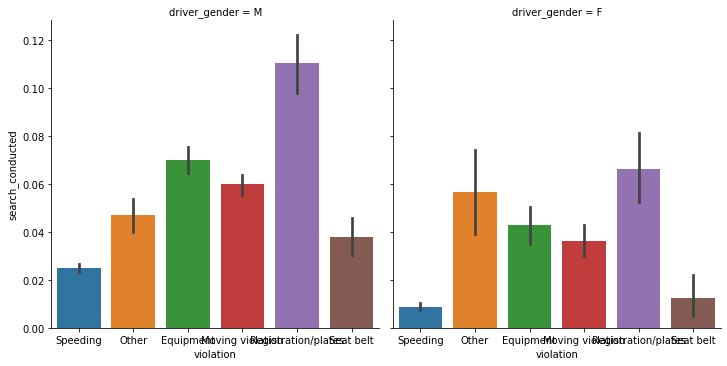

In [109]:
sns.catplot(x='violation', y='search_conducted', col='driver_gender', data=df, kind='bar')
tricks

-----------------

📌 Counting protective frisks

In [74]:
df["search_type"].value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

In [79]:
df['frisk']=df['search_type'].str.contains('Protective Frisk', na=False)
df['frisk']

stop_datetime
2005-01-02 01:55:00    False
2005-01-18 08:15:00    False
2005-01-23 23:15:00    False
2005-02-20 17:15:00    False
2005-03-14 10:00:00    False
                       ...  
2015-12-31 20:27:00    False
2015-12-31 20:35:00    False
2015-12-31 20:45:00    False
2015-12-31 21:42:00    False
2015-12-31 22:46:00    False
Name: frisk, Length: 86406, dtype: bool

In [83]:
searched=df[df['search_conducted']==True]
searched.sample(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
stop_datetime,,,,,,,,,,,,,,,
2009-05-08 17:40:00,2009-05-08,17:40,M,1977.0,32.0,White,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Citation,False,0-15 Min,False,False
2012-02-02 11:46:00,2012-02-02,11:46,M,1986.0,26.0,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,16-30 Min,False,False
2006-07-16 08:45:00,2006-07-16,08:45,M,1978.0,28.0,Hispanic,Speeding,Speeding,True,Incident to Arrest,Citation,False,16-30 Min,False,False


In [84]:
searched[searched['frisk']==True].mean()

driver_age_raw        1971.288321
driver_age              30.128676
search_conducted         1.000000
is_arrested              0.208029
drugs_related_stop       0.116788
frisk                    1.000000
dtype: float64

In [133]:
df.groupby('driver_gender')['frisk'].mean()

driver_gender
F    0.001233
M    0.003895
Name: frisk, dtype: float64

In [134]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.groupby('driver_gender')['frisk'].mean().index.values, 
    y=df.groupby('driver_gender')['frisk'].mean().values,
    name='Female',
    marker_color='#B6E880'
))

fig.show()

---------------

📌 When a police officer stops a driver, a small percentage of these stops result in an arrest.   
This is known as the arrest rate. I'll look into whether the arrest rate varies with the time of day.

In [140]:
df.sample()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
stop_datetime,,,,,,,,,,,,,,,
2006-11-02 22:20:00,2006-11-02,22:20,M,1975.0,31.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False


In [137]:
hourly_arrest_rate=df.groupby(df.index.hour)['is_arrested'].mean()
hourly_arrest_rate.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='stop_datetime')

In [139]:
fig = px.line(df, 
              x=hourly_arrest_rate.index.values ,
              y=hourly_arrest_rate.values,
                )
        
fig.show()

--------------

📌Drugs were found in the search while stopping in a small segment of traffic.   
I will assess whether these drug-related pauses become more common over time.

In [142]:
df['drugs_related_stop'].value_counts()

False    85591
True       815
Name: drugs_related_stop, dtype: int64

In [144]:
annual_drug_rate=df['drugs_related_stop'].resample('A').mean()
annual_drug_rate

stop_datetime
2005-12-31    0.007186
2006-12-31    0.005818
2007-12-31    0.007524
2008-12-31    0.006993
2009-12-31    0.011607
2010-12-31    0.008721
2011-12-31    0.008449
2012-12-31    0.010870
2013-12-31    0.011858
2014-12-31    0.013335
2015-12-31    0.010448
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [145]:
fig = px.line(df, 
              x=annual_drug_rate.index.values ,
              y=annual_drug_rate.values,
                )
        
fig.show()

📌 As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015.  
You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.    

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate.   
If the hypothesis is true, then you'll see both rates increasing over time.

In [147]:
annual_search_rate=df['search_conducted'].dropna().astype('int').resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.051098
2006-12-31    0.040134
2007-12-31    0.040876
2008-12-31    0.036069
2009-12-31    0.052646
2010-12-31    0.041458
2011-12-31    0.036436
2012-12-31    0.034052
2013-12-31    0.027624
2014-12-31    0.029834
2015-12-31    0.028308
Freq: A-DEC, Name: search_conducted, dtype: float64

In [152]:
annual=pd.concat([annual_drug_rate,annual_search_rate],axis='columns')
annual.values

array([[0.00718563, 0.0510978 ],
       [0.00581797, 0.04013411],
       [0.00752386, 0.04087591],
       [0.00699301, 0.03606919],
       [0.01160702, 0.05264612],
       [0.00872051, 0.04145818],
       [0.00844884, 0.03643564],
       [0.01086957, 0.03405156],
       [0.01185824, 0.02762431],
       [0.01333484, 0.02983388],
       [0.01044831, 0.02830762]])

In [153]:
fig = px.line(annual, x=annual.index.values, y=annual.values, color=annual.columns.values)
fig.show()

ValueError: All arguments should have the same length. The length of argument `wide_variable_0` is 2, whereas the length of  previously-processed arguments ['x'] is 11